# Prediksi Jumlah Kasus COVID-19 di Indonesia
Contoh source code exponential fitting diambil dari: https://github.com/emilyripka/BlogRepo/blob/master/181113_CurveFitting.ipynb

In [133]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [134]:
covid_x=[1,2,3,4,5,6,7, 8.00 , 9.00 , 10.00 , 11.00 , 12.00 , 13.00 , 14.00 , 15.00 , 16.00 , 17.00 , 18.00 , 19.00 , 20.00 ,
 21.00 , 22.00 , 23.00 , 24.00 ]

In [135]:
covid_y=[2,2,2,2,4,4,6,19,27,34,34,69,96,117,134,172,227,309,369,450,514,579,686,790]

In [136]:
# membuat numpy matrix untuk x
np_covid_x=np.array(covid_x)

In [137]:
np_covid_x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [138]:
covid_x_pred=[1,2,3,4,5,6,7, 8.00 , 9.00 , 10.00 , 11.00 , 12.00 , 13.00 , 14.00 , 15.00 , 16.00 , 17.00 , 18.00 , 19.00 , 20.00 ,
 21.00 , 22.00 , 23.00 , 24.00 , 25.00 ,26,27,28,29,31]

In [139]:
covid_x_pred_np=np.array(covid_x_pred)

In [140]:
covid_x_pred_np

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 31.])

In [141]:
np_covid_y=np.array(covid_y)

In [142]:
np_covid_y

array([  2,   2,   2,   2,   4,   4,   6,  19,  27,  34,  34,  69,  96,
       117, 134, 172, 227, 309, 369, 450, 514, 579, 686, 790])

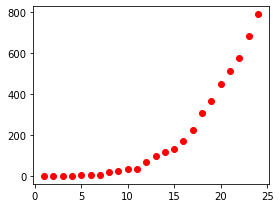

In [156]:
# plot data mentah
fig = plt.figure(figsize=(4,3))
#gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(np_covid_x, np_covid_y, "ro")

fig.tight_layout()
fig.savefig("rawExponential.png", format="png",dpi=1000)

# Prediksi dengan exponensial + konstanta

In [157]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [158]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_exponential: this contains the fitting parameters
#   pcov_exponential: estimated covariance of the fitting paramters
#popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, np_covid_x, np_covid_y, p0=[1,0.5, 1])
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, np_covid_x, np_covid_y)

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

In [159]:
# this cell prints the fitting parameters with their errors
print ("pre-exponential factor = %0.2f (+/-) %0.2f" % (popt_exponential[0], perr_exponential[0]))
print ("rate constant = %0.2f (+/-) %0.2f" % (popt_exponential[1], perr_exponential[1]))

pre-exponential factor = 18.39 (+/-) 3.32
rate constant = 0.16 (+/-) 0.01


In [160]:
popt_exponential

array([ 18.38503176,   0.16022515, -43.1995116 ])

In [161]:
covid_y_pred_np=exponential(covid_x_pred_np, *popt_exponential)

In [162]:
covid_y_pred_np

array([-2.16196189e+01, -1.78695707e+01, -1.34678574e+01, -8.30123584e+00,
       -2.23678409e+00,  4.88151843e+00,  1.32368048e+01,  2.30440319e+01,
        3.45555110e+01,  4.80673987e+01,  6.39273162e+01,  8.25432926e+01,
        1.04394262e+02,  1.30042387e+02,  1.60147517e+02,  1.95484169e+02,
        2.36961452e+02,  2.85646455e+02,  3.42791700e+02,  4.09867365e+02,
        4.88599112e+02,  5.81012477e+02,  6.89484984e+02,  8.16807314e+02,
        9.66255095e+02,  1.14167318e+03,  1.34757457e+03,  1.58925649e+03,
        1.87293671e+03,  2.59675335e+03])

# Prediksi dengan polinom orde 3

In [163]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def polinom(x, a, b, c,d):
    return a*x*x*x  + b*x*x + c*x + d

In [164]:
parameter_polinom, pcov_exponential = scipy.optimize.curve_fit(polinom, np_covid_x, np_covid_y)

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

In [165]:
covid_prediksi_polinom_y=polinom(covid_x_pred_np, *parameter_polinom)

In [166]:
covid_prediksi_polinom_y

array([4.39145299e+00, 3.50995912e+00, 2.46542684e+00, 1.73930610e+00,
       1.81304686e+00, 3.16809905e+00, 6.28591264e+00, 1.16479376e+01,
       1.97356238e+01, 3.10304213e+01, 4.60137799e+01, 6.51671498e+01,
       8.89719807e+01, 1.17909723e+02, 1.52461826e+02, 1.93109740e+02,
       2.40334914e+02, 2.94618800e+02, 3.56442847e+02, 4.26288504e+02,
       5.04637222e+02, 5.91970450e+02, 6.88769640e+02, 7.95516239e+02,
       9.12691700e+02, 1.04077747e+03, 1.18025500e+03, 1.33160574e+03,
       1.49531114e+03, 1.86171173e+03])

In [167]:
counter=0
for x in (covid_x_pred_np):
    print(x,covid_y_pred_np[counter],covid_prediksi_polinom_y[counter])
    counter=counter+1

1.0 -21.619618900607488 4.3914529914551546
2.0 -17.869570651860474 3.5099591229785245
3.0 -13.467857352382019 2.4654268436065476
4.0 -8.301235835637748 1.7393061043423557
5.0 -2.2367840912572774 1.8130468561890782
6.0 4.881518428238024 3.1680990501498423
7.0 13.23680475828526 6.285912637227784
8.0 23.044031897884764 11.647937568426027
9.0 34.55551102240135 19.735623794747696
10.0 48.06739870970867 31.030421267195955
11.0 63.927316179877764 46.0137799367739
12.0 82.54329256908808 65.16714975448464
13.0 104.39426232195538 88.9719806713314
14.0 130.04238676937658 117.90972263831716
15.0 160.14751688993258 152.4618256064452
16.0 195.4841693392597 193.10973952671853
17.0 236.96145249080888 240.33491435014037
18.0 285.6464551265505 294.61880002771375
19.0 342.79169950000374 356.442846510442
20.0 409.86736505833863 426.2885037493281
21.0 488.59911184536793 504.637221695375
22.0 581.0124766705882 591.9704502995863
23.0 689.4849842274284 688.7696395129645
24.0 816.8073138268553 795.516239286513

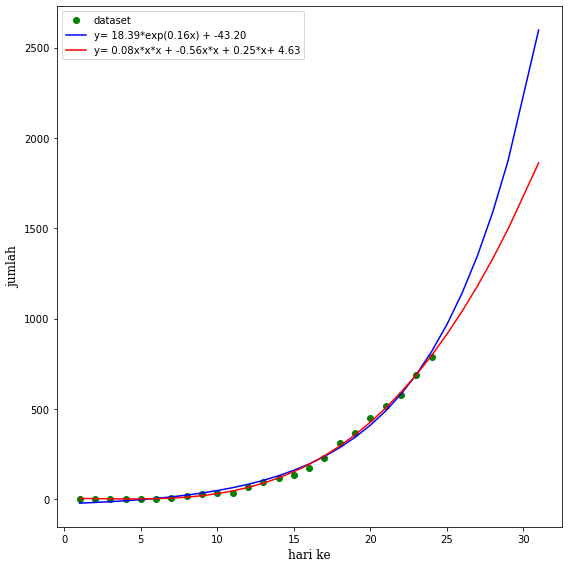

In [168]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
label_exponensial="y= %0.2f*exp(%0.2fx) + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2])
label_polinom="y= %0.2fx*x*x + %0.2fx*x + %0.2f*x+ %0.2f" % (parameter_polinom[0], parameter_polinom[1], parameter_polinom[2], parameter_polinom[3])

ax1.plot(np_covid_x, np_covid_y, "go",label="dataset")
ax1.plot(covid_x_pred_np, covid_y_pred_np,"b-",label=label_exponensial)
ax1.plot(covid_x_pred_np, covid_prediksi_polinom_y,"r-", label=label_polinom)

ax1.set_xlabel("hari ke",family="serif",  fontsize=12)
ax1.set_ylabel("jumlah",family="serif",  fontsize=12)
ax1.legend(loc='best')

fig.tight_layout()
fig.savefig("fit-eksponensial-polinom.png", format="png",dpi=1000)